# Import Software Packages

In [1]:
import sys                                             # Read system parameters.
import os                                              # Interact with the operating system
import numpy as np                                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                                    # Manipulate and analyze data.
import matplotlib as mpl                               # Create 2D charts.
import matplotlib.pyplot as plt                        # Create figures
import matplotlib.cm as cm                             # Create Color maps
import seaborn as sb                                   # Perform data visualization.
import sklearn                                         # Perform data mining and analysis.
from sklearn import datasets

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- Seaborn {}'.format(sb.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

Libraries used in this project:
- Python 3.8.18 | packaged by conda-forge | (default, Dec 23 2023, 17:23:49) 
[Clang 15.0.7 ]
- NumPy 1.24.3
- pandas 2.0.3
- Matplotlib 3.7.2
- Seaborn 0.9.0
- scikit-learn 1.3.2



# Load Dataset

In [2]:
PROJECT_ROOT_DIR = "."
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "data/")
print("Data files in this project:", os.listdir(DATA_PATH))

# Read the raw dataset
raw_housing_data_file = os.path.join(DATA_PATH, "BostonHousing.csv")
raw_housing_data = pd.read_csv(raw_housing_data_file)
print(
    "Loaded {} records from {}.\n".format(len(raw_housing_data), raw_housing_data_file)
)

Data files in this project: ['BostonHousing.csv', '.ipynb_checkpoints']
Loaded 506 records from ./data/BostonHousing.csv.



# Explore the Dataset

#### View features and data types

**View Columns**

- **CRIM** is the per-capita crime rate of the area.
- **CHAS** refers to the "Charles River dummy variable"—if 1, the land bounds the river; if 0, it
does not.
- **NOX** is the level of nitrogen oxides (NO2) in the area. High levels of NO2 can cause health
issues.
- **RM** is the average number of rooms per house.
- **AGE** is the proportion of occupied units built before 1940.
- **DIS** is the weighted mean distance to several employment centers around Boston.
- **TAX** is the property tax rate per $10,000.
- **PTRATIO** is the ratio of pupils (students) to teachers in the school district.
- **Target** also refers to MEDV, the median value of the house in thousands of dollars

In [3]:
raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


- The training set includes **506 rows** and **14 columns**.
- 11 columns contain float values and **3** columns contain integer values.
- There is **no missing data** as all rows have values for every column.

# Explore Feature Distributions

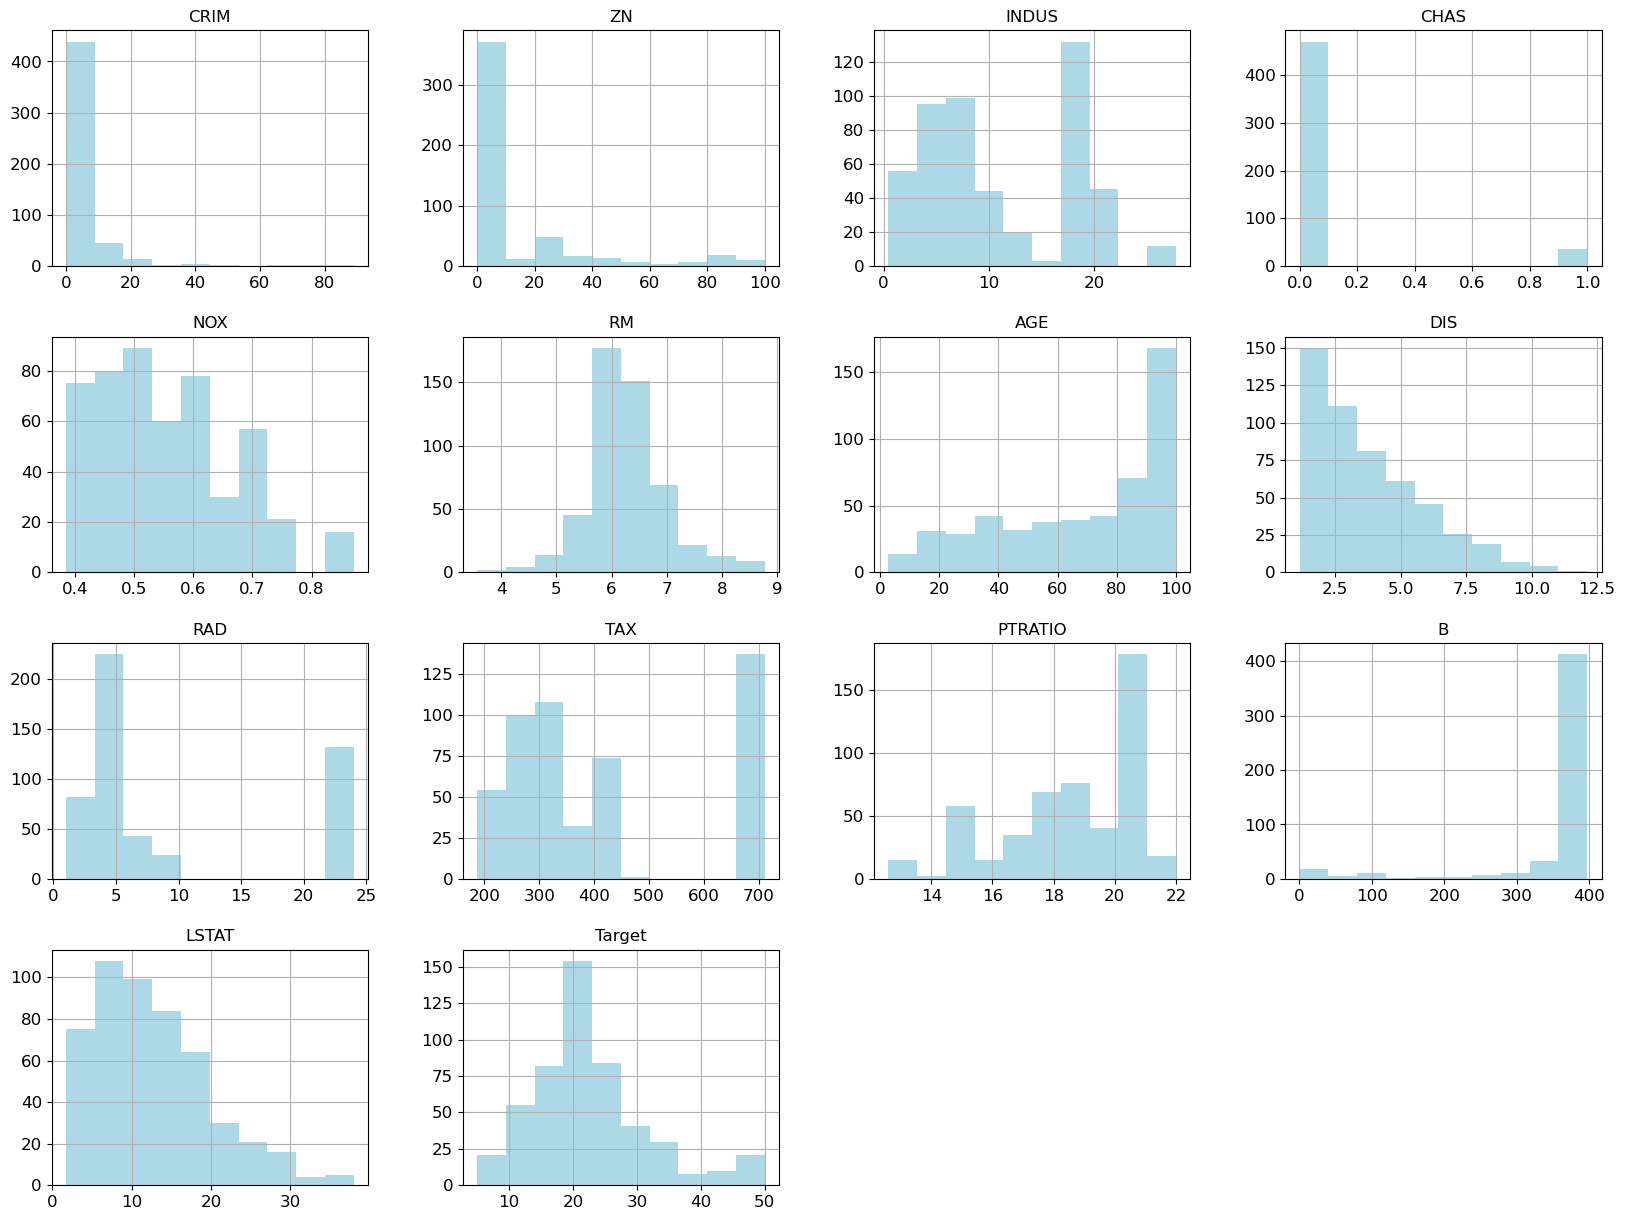

<Figure size 640x480 with 0 Axes>

In [4]:
# Matplotlib to plot figures.
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

raw_housing_data.hist(figsize=(20,15), color='lightblue')
plt.figure();

**Spotlights**

- The left-skew for the **age** of houses indicates that a large portion of the houses in the area are considerably old.
- Most houses are near employment centers as indicated by the right-skewed for the mean **distance(DIS)**.  
- NO2 levels seem to vary, but the majority are generally low.  
- The distribution of the number of rooms appears to be approximately symmetrical.  
- **Target**, the median value of houses, exhibits a fairly symmetrical distribution, although there may be a few higher outliers.  

# Statistical Measures

In [5]:
with pd.option_context('float_format', '{:.2f}'.format): 
    print(raw_housing_data.describe())

        CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
count 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00   
mean    3.61  11.36  11.14   0.07   0.55   6.28  68.57   3.80   9.55 408.24   
std     8.60  23.32   6.86   0.25   0.12   0.70  28.15   2.11   8.71 168.54   
min     0.01   0.00   0.46   0.00   0.39   3.56   2.90   1.13   1.00 187.00   
25%     0.08   0.00   5.19   0.00   0.45   5.89  45.02   2.10   4.00 279.00   
50%     0.26   0.00   9.69   0.00   0.54   6.21  77.50   3.21   5.00 330.00   
75%     3.68  12.50  18.10   0.00   0.62   6.62  94.07   5.19  24.00 666.00   
max    88.98 100.00  27.74   1.00   0.87   8.78 100.00  12.13  24.00 711.00   

       PTRATIO      B  LSTAT  Target  
count   506.00 506.00 506.00  506.00  
mean     18.46 356.67  12.65   22.53  
std       2.16  91.29   7.14    9.20  
min      12.60   0.32   1.73    5.00  
25%      17.40 375.38   6.95   17.02  
50%      19.05 391.44  11.36   21.20  
75%      20.20 

**Spotlights**

The scales for the features are seemingly disproportionate, particularly when looking at lower-scale features such as **CRIM** (which has a mean of 3.61) in contrast to higher-scale features like **TAX** (with a mean of 408.24). Unlike simple linear regression, regularized linear regression gains advantages from scaling the features. When features are scaled, the regularization penalty can be uniformly applied to the data, preventing any single feature from being disproportionately influential. Additionally, scaling can mitigate the impact of outliers on regularized linear regression.

# Discover Correlations to 'Target' 

In [6]:
# Correlations between numeric features and 'Target'.
print('Correlations with median house value')
print(raw_housing_data.corr()['Target'].sort_values(ascending=False))

Correlations with median house value
Target     1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Target, dtype: float64


**Spotlights**

It seems that several of these characteristics show some level of correlation with the median house value, whether that correlation is positive or negative. The **feature with the lowest correlation is CHAS**, a categorical variable that shows whether a property's location is adjacent to the Charles River. 

# Split the Label from the Dataset

The dependent variable, which is 'Target' and is the value to be predicted, will be extracted from the training data and placed into a separate DataFrame designated for labels.

Cross-validation will be used to train the data instead of applying the holdout approach to divide the datasets into a training set and a validation/test set. Cross-validation can enhance the model's capability to generalize to unseen data. 

This next step separates the labels from the training set (X) and organizes them into their own vector (y) then examines the number of columns in the initial dataset in relation to the new training and label sets.

In [7]:
label_columns = ['Target']

X, y = raw_housing_data.loc[:, 'CRIM': 'LSTAT'], raw_housing_data[label_columns]

print(f'Original set:    {raw_housing_data.shape}')
print('------------------------------')
print(f'Training data:   {X.shape}')
print(f'Training labels: {y.shape}')

Original set:    (506, 14)
------------------------------
Training data:   (506, 13)
Training labels: (506, 1)


# Drop the Weakest Correlation 

Since the **CHAS** correlation is weak and the feature in question is categorical rather than numeric (unlike the other features), it will be excluded from the training process.

In [8]:
def drop_weakest_correlation_column(dataset):
    
    print('Columns prior to drop:\n\n{}\n'.format(list(dataset.columns)))
        
    dataset = dataset.drop(['CHAS'], axis = 1)
    
    print('Columns after drop:\n\n{}\n'.format(list(dataset.columns)))
    return dataset

X = drop_weakest_correlation_column(X.copy())

Columns prior to drop:

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

Columns after drop:

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']



# Standardize the Features

This function incorporates the z-score formula, which is utilized for standardizing the data. 

In [9]:
def standardize_features(X):
    result = X.copy()
    
    for feature in X.columns:
        result[feature] = (X[feature] - X[feature].mean()) / X[feature].std()  # z-score formula.
        
    return result

X = standardize_features(X)

print('The features have been standardized.')

The features have been standardized.


In [10]:
with pd.option_context('float_format', '{:.2f}'.format):
    print(X.describe())

        CRIM     ZN  INDUS    NOX     RM    AGE    DIS    RAD    TAX  PTRATIO  \
count 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00   506.00   
mean   -0.00   0.00   0.00  -0.00  -0.00  -0.00  -0.00   0.00   0.00    -0.00   
std     1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00     1.00   
min    -0.42  -0.49  -1.56  -1.46  -3.88  -2.33  -1.27  -0.98  -1.31    -2.70   
25%    -0.41  -0.49  -0.87  -0.91  -0.57  -0.84  -0.80  -0.64  -0.77    -0.49   
50%    -0.39  -0.49  -0.21  -0.14  -0.11   0.32  -0.28  -0.52  -0.46     0.27   
75%     0.01   0.05   1.01   0.60   0.48   0.91   0.66   1.66   1.53     0.81   
max     9.92   3.80   2.42   2.73   3.55   1.12   3.96   1.66   1.80     1.64   

           B  LSTAT  
count 506.00 506.00  
mean   -0.00  -0.00  
std     1.00   1.00  
min    -3.90  -1.53  
25%     0.20  -0.80  
50%     0.38  -0.18  
75%     0.43   0.60  
max     0.44   3.55  


**Spotlights**

Every feature has been adjusted so that its **mean is 0 and its standard deviation is 1**. Consequently, the values have been reduced in scale.

Transforming the raw data into z-scores standardizes it and offers several advantages:

- Gain insight into how a data point relates to the overall distribution.
- Facilitate comparisons among different variables.
- Detect anomalies/outliers.
- Determine probabilities and percentiles utilizing the standard normal distribution.

# Train Model and Calculate Scores

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error as mse

**Predict**

In [ ]:
def predict(estimator, data_to_fit, target_variable, strategy): 
    return cross_val_predict(estimator, data_to_fit, np.ravel(target_variable), cv=strategy)

**Calculate Score**

In [ ]:
def calculate_score(estimator, data_to_fit, target_variable, strategy):
    return cross_val_score(estimator, data_to_fit, np.ravel(target_variable), cv=strategy).mean()